In [26]:
# Import libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import plotly.graph_objects as go

[*********************100%***********************]  1 of 1 completed
/var/folders/mq/8p56glg57dn85zhn6f63jxmr0000gn/T/ipykernel_6668/2021677226.py:22: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

/Users/cheryl/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



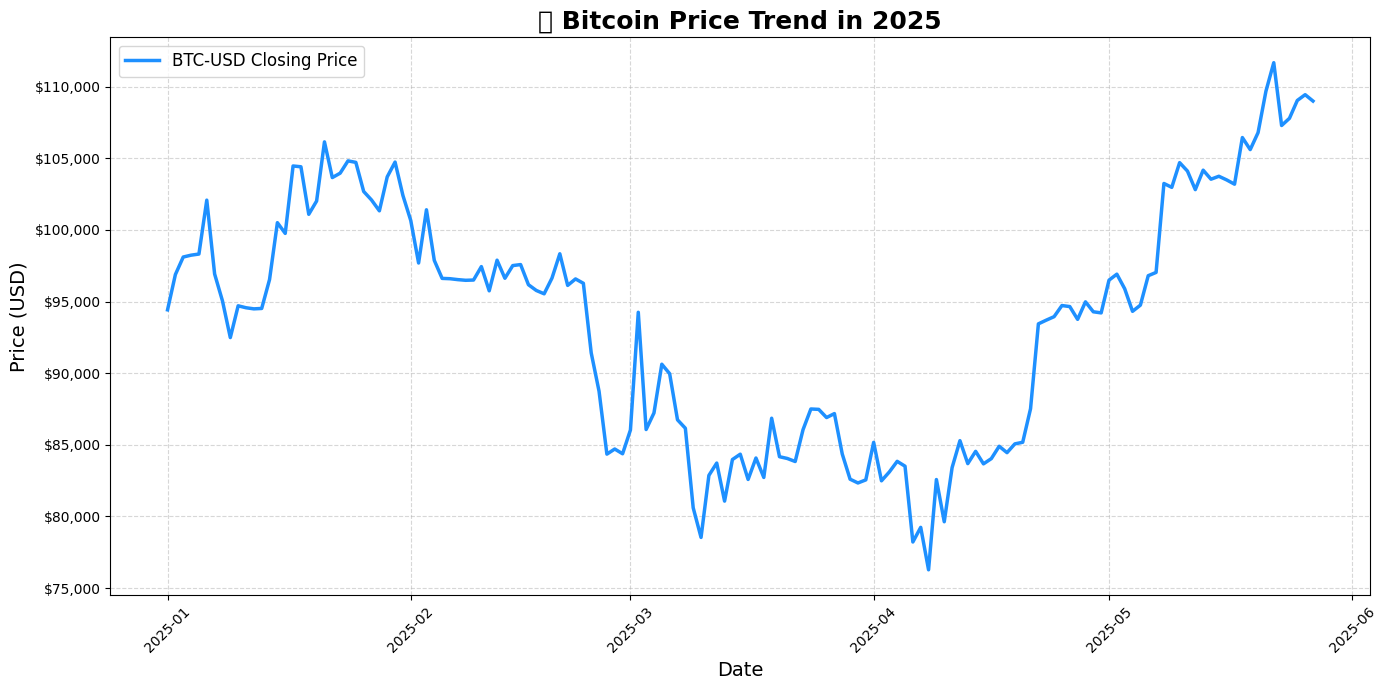

In [27]:
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datetime import datetime

df = yf.download('BTC-USD', start='2025-01-01', end=datetime.today().strftime('%Y-%m-%d'))
df = df[['Close']].dropna()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], color='dodgerblue', linewidth=2.5, label='BTC-USD Closing Price')

plt.title('📈 Bitcoin Price Trend in 2025', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))


plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()


In [28]:
# Preprocessing
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, 0])
        y.append(data[i, 0])
    X = np.array(X)
    y = np.array(y)
    return np.reshape(X, (X.shape[0], X.shape[1], 1)), y

window_size = 60
X, y = create_sequences(scaled_data, window_size)

In [29]:
# Step 1: Split into training and test sets (80/20)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - window_size:]  # retain overlap for windowing

# Step 2: Create sequences from train and test sets
X_train, y_train = create_sequences(train_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)

# Step 3: Build and Train the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)


2025-05-28 21:49:17.426863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-05-28 21:49:17.428202: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-05-28 21:49:17.429160: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2025-05-28 21:49:17.755321: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-05-28 21:49:17.756671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-05-28 21:49:17.757555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2/2 [==============================] - 2s 32ms/step - loss: 0.0751
Epoch 2/10
2/2 [==============================] - 0s 30ms/step - loss: 0.0409
Epoch 3/10
2/2 [==============================] - 0s 30ms/step - loss: 0.0199
Epoch 4/10
2/2 [==============================] - 0s 31ms/step - loss: 0.0181
Epoch 5/10
2/2 [==============================] - 0s 31ms/step - loss: 0.0218
Epoch 6/10
2/2 [==============================] - 0s 29ms/step - loss: 0.0167
Epoch 7/10
2/2 [==============================] - 0s 31ms/step - loss: 0.0137
Epoch 8/10
2/2 [==============================] - 0s 33ms/step - loss: 0.0139
Epoch 9/10
2/2 [==============================] - 0s 30ms/step - loss: 0.0146
Epoch 10/10
2/2 [==============================] - 0s 29ms/step - loss: 0.0146


2025-05-28 21:49:20.651885: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-05-28 21:49:20.652931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-05-28 21:49:20.653828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 1s 8ms/step


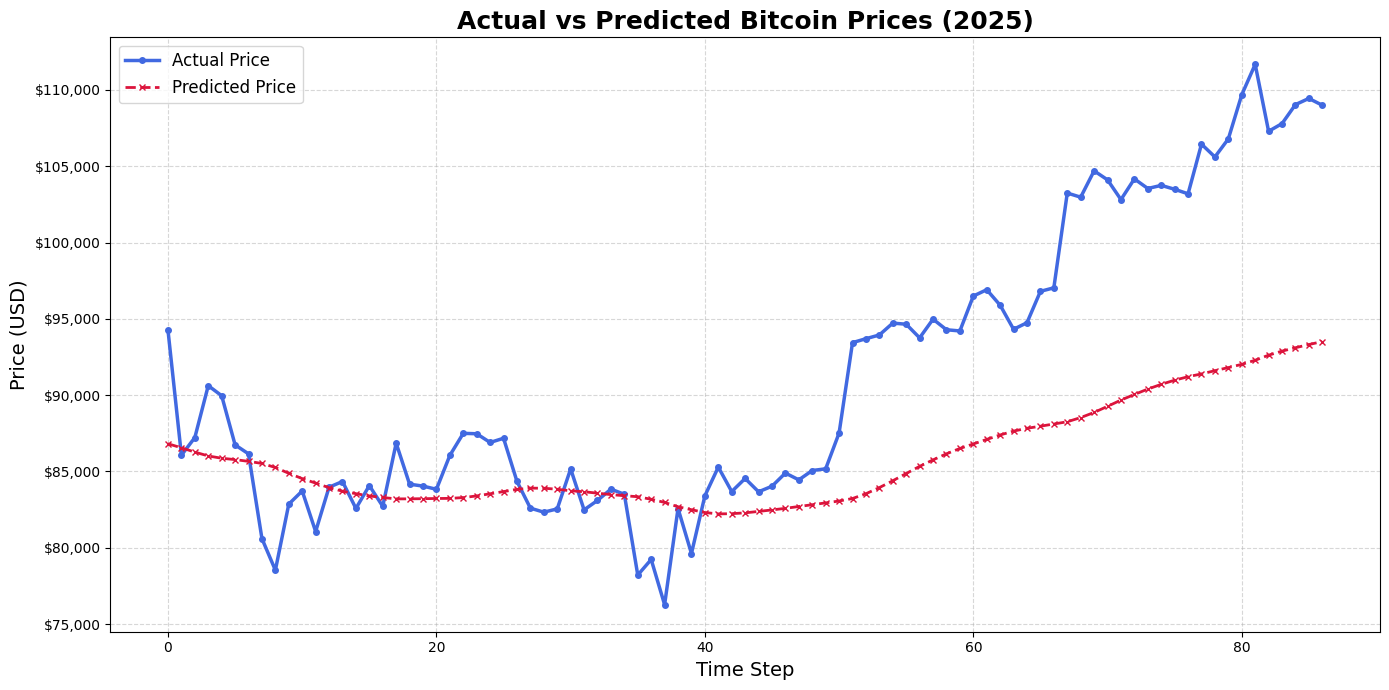

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Section 4: Predictions and Visualization (Enhanced & Cleaned)
predicted_price = model.predict(X)
actual_price = scaler.inverse_transform(y.reshape(-1, 1))
predicted_price = scaler.inverse_transform(predicted_price)

plt.figure(figsize=(14, 7))
plt.plot(actual_price, label='Actual Price', color='royalblue', linewidth=2.5, marker='o', markersize=4)
plt.plot(predicted_price, label='Predicted Price', color='crimson', linestyle='--', linewidth=2, marker='x', markersize=4)

plt.title('Actual vs Predicted Bitcoin Prices (2025)', fontsize=18, fontweight='bold')
plt.xlabel('Time Step', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



In [31]:
# Save the trained model
model.save("/Users/cheryl/Downloads/btc_lstm_model.h5")
print("✅ Model successfully saved to your Downloads folder!")


✅ Model successfully saved to your Downloads folder!


In [32]:
# Evaluation

predicted_price = model.predict(X_test)

# Inverse transform predictions and actuals
actual_price = scaler.inverse_transform(y_test.reshape(-1, 1))
predicted_price = scaler.inverse_transform(predicted_price)

rmse = np.sqrt(mean_squared_error(actual_price, predicted_price))
mae = mean_absolute_error(actual_price, predicted_price)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

1/1 [==============================] - 0s 29ms/step
RMSE: 13123.21
MAE: 12686.49


In [33]:
import yfinance as yf
import plotly.graph_objects as go
from datetime import datetime

# Download BTC-USD data
df = yf.download('BTC-USD', start='2025-01-01', end='2025-12-31')

# Check actual column names
print("Original columns:", df.columns)

# Rename correctly (based on typical yfinance structure: Open, High, Low, Close, Volume)
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Plot candlestick chart
if not df.empty and {'Open', 'High', 'Low', 'Close'}.issubset(df.columns):
    fig = go.Figure(data=[go.Candlestick(
        x=df.index,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close']
    )])
    
    fig.update_layout(
        title='Bitcoin Candlestick Chart (2025)',
        xaxis_title='Date',
        yaxis_title='Price (USD)',
        xaxis_rangeslider_visible=False,
        template='plotly_dark'
    )
    fig.show()
else:
    print("Still no usable candlestick data found.")


[*********************100%***********************]  1 of 1 completed

Original columns: MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])


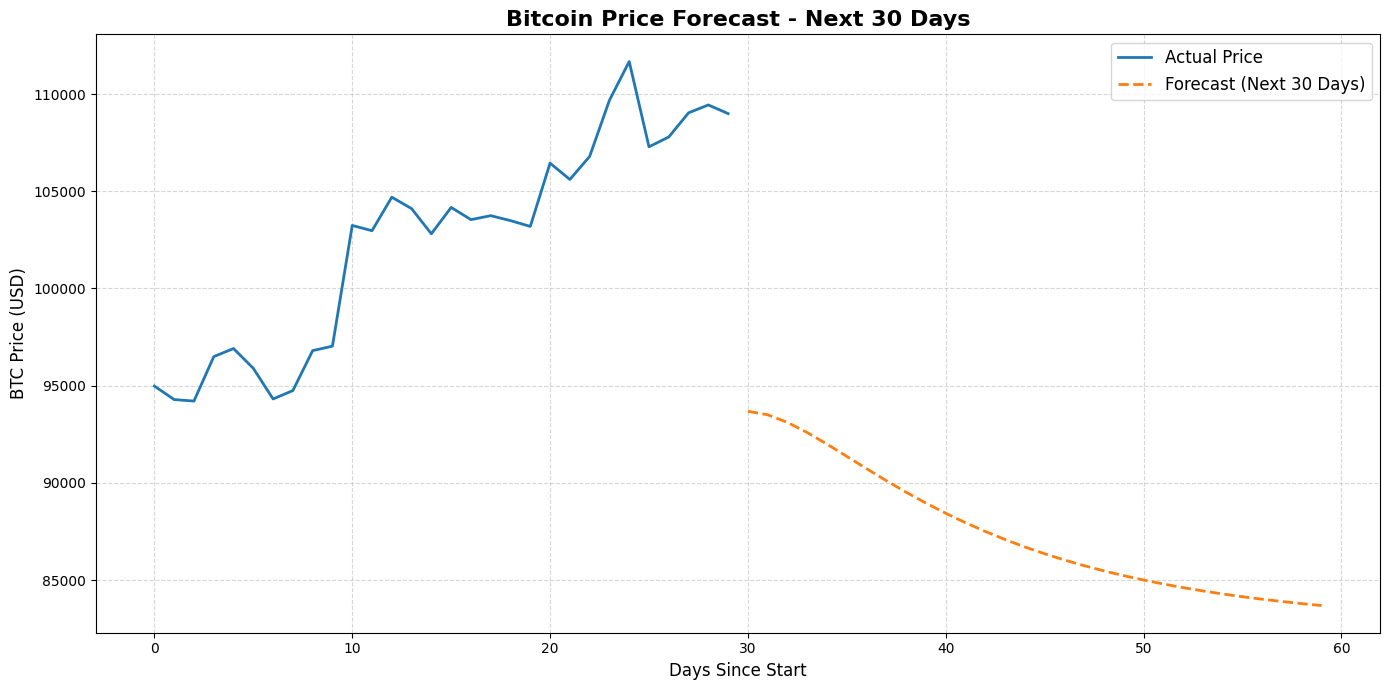

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Forecast future prices (next 30 days)
last_sequence = scaled_data[-window_size:]
forecast = []

for _ in range(30):
    input_seq = last_sequence.reshape(1, window_size, 1)
    next_price = model.predict(input_seq, verbose=0)[0, 0]
    forecast.append(next_price)
    last_sequence = np.append(last_sequence[1:], [[next_price]], axis=0)

# Inverse transform forecast
forecast_prices = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Generate timeline
actual_days = np.arange(len(actual_price))
forecast_days = np.arange(len(actual_price), len(actual_price) + 30)

# Plotting without emojis to avoid font warnings
plt.figure(figsize=(14, 7))
plt.plot(actual_days, actual_price, label='Actual Price', color='#1f77b4', linewidth=2)
plt.plot(forecast_days, forecast_prices, label='Forecast (Next 30 Days)', color='#ff7f0e', 
         linestyle='--', linewidth=2)

# Enhanced formatting
plt.title('Bitcoin Price Forecast - Next 30 Days', fontsize=16, fontweight='bold')
plt.xlabel('Days Since Start', fontsize=12)
plt.ylabel('BTC Price (USD)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


